# Daten importieren


In [1]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("tourism_marketing_data.csv")
df

,Num_Attractions,Marketing_Budget (Tsd.),Num_Tourists (Tsd.)
0,56,212,202
1,97,317,330
2,19,156,113
3,76,421,345
4,65,130,174
...,...,...,...
95,86,391,341
96,57,247,230
97,28,353,219
98,30,353,228


# Daten visualisieren

Text(0.5, 0, 'Num_Tourists (Tsd.)')

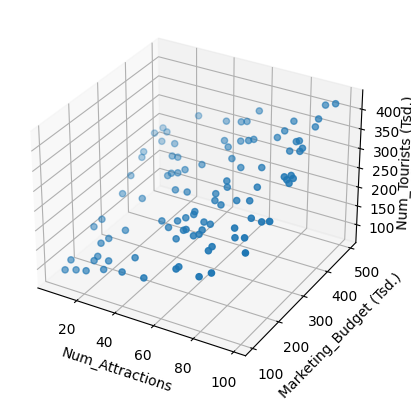

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Schritt 2: Vervollständige den untenstehenden Code, um die Daten zu visualisieren.
ax.scatter(df["Num_Attractions"], df["Marketing_Budget (Tsd.)"], df["Num_Tourists (Tsd.)"])

ax.set_xlabel("Num_Attractions")
ax.set_ylabel("Marketing_Budget (Tsd.)")
ax.set_zlabel("Num_Tourists (Tsd.)", labelpad=-0.1)

# Daten aufteilen

In [11]:
# Schritt 3: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.

X = df[["Num_Attractions", "Marketing_Budget (Tsd.)"]]
y = df["Num_Tourists (Tsd.)"]

In [12]:
X

,Num_Attractions,Marketing_Budget (Tsd.)
0,56,212
1,97,317
2,19,156
3,76,421
4,65,130
...,...,...
95,86,391
96,57,247
97,28,353
98,30,353


In [13]:
y

0     202
1     330
2     113
3     345
4     174
     ... 
95    341
96    230
97    219
98    228
99    330
Name: Num_Tourists (Tsd.), Length: 100, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

#Schritt 4: Unterteile die Daten in Trainings- und Testdaten, wobei die Testdaten 20% der Gesamtdaten ausmachen sollten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train

,Num_Attractions,Marketing_Budget (Tsd.)
43,7,402
62,48,427
3,76,421
71,6,229
45,11,131
...,...,...
96,57,247
67,85,189
64,51,103
47,77,164


In [16]:
y_train

43    210
62    296
3     345
71    126
45     81
     ... 
96    230
67    241
64    141
47    222
44    191
Name: Num_Tourists (Tsd.), Length: 80, dtype: int64

# Modell trainieren

In [17]:
from sklearn.linear_model import LinearRegression

# Schritt 5: Erstelle eine Instanz eines linearen Regressionsmodells und trainiere dieses Modell auf den Trainingsdaten.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Vorhersage

In [18]:
# Schritt 6: Nutze das trainierte Modell, um Vorhersagen für die Testdaten zu generieren.

y_predict = model.predict(X_test)

# Modellbewertung (Mean Absolute Error)

In [19]:
from sklearn.metrics import mean_absolute_error

# Schritt 7: Berechne den Mean Absolute Error (MAE) basierend auf den Vorhersagen und den Testdaten und vervollständige die 'print()'-Funktion.
mae = mean_absolute_error(y_predict, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.95103533754879


# Modellparameter

In [20]:
# Schritt 8: Extrahiere die Parameter m_1, m_2 und c und vervollständige die 'print()'-Funktion.

m_1, m_2 = model.coef_
c = model.intercept_

print(f"m1: {m_1}, m2: {m_2}, c: {c}")

m1: 1.7988105908665175, m2: 0.49674777336777287, c: 1.531765117509508


# Modell visualisieren

Text(0.5, 0, 'Num_Tourists (Tsd.)')

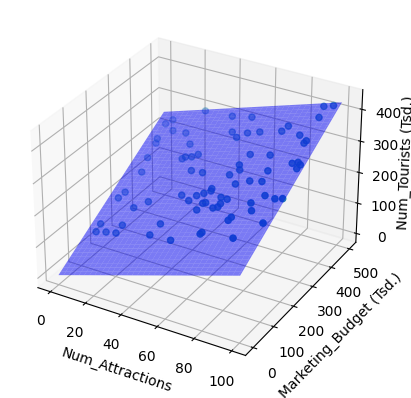

In [21]:
import numpy as np

# Schritt 9: Vervollständige den untenstehenden Code, um das Modell zu visualisieren.
X_1, X_2 = np.meshgrid(range(0, 101), range(0, 501))
yy = m_1 * X_1 + m_2 * X_2 + c

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_train["Num_Attractions"], X_train["Marketing_Budget (Tsd.)"], y_train)
ax.plot_surface(X_1, X_2, yy, color="blue", alpha=0.5)

ax.set_xlabel("Num_Attractions")
ax.set_ylabel("Marketing_Budget (Tsd.)")
ax.set_zlabel("Num_Tourists (Tsd.)", labelpad=-0.1)